In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [78]:
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'font.size': 22})

In [79]:
def make_plot(x, y_data, labels, xlabel):
    no_labels = False
    if labels is None:
        no_labels = True
        labels = [' '] * len(y_data)
    
    colors = ['black', 'darkorchid', 'blue', 'darkgreen', 'gold', 'firebrick', 'violet', 'c', 'darkorange', 'lightcoral', 'purple', 'aqua', 'darkolivegreen', 'peru', 'dimgray']
    
    f, ax = plt.subplots(figsize=(14, 10))
    
    for i, y in enumerate(y_data):
        l = labels[i]
        j = i % len(colors)
        c = colors[j]
        ax.plot(x, y, linestyle='--', marker='o', markersize=6, label=l, color=c)
    
    ax.set_ylabel("Run Time (s)", labelpad=30)
    ax.set_xlabel(xlabel, labelpad=30)
    
    if not no_labels:
        plt.legend()
    
    plt.show()

In [80]:
sizes = [20000, 10000, 5000, 2500, 1000, 500]
cuts = [0.5, 0.4, 0.3, 0.2, 0.1]

In [81]:
# orginial_no_opt_size = [10.1717, 2.5415, 0.6366, 0.1611, 0.0266, 0.0074]
# orginial_O1_size = [4.6510, 1.1673, 0.2935, 0.0759, 0.0126, 0.0035]
# orginial_O2_size = [4.2149, 1.0617, 0.2658, 0.0684, 0.0119, 0.0033]
# orginial_O3_size = [4.1887, 1.0478, 0.2620, 0.0675, 0.0118, 0.0031]

# make_plot(sizes, [orginial_no_opt_size, orginial_O1_size, orginial_O2_size, orginial_O3_size], ['Original', 'O1', 'O2', 'O3'], "Problem Size - N")

In [6]:
# check_dist_slurm_no_opt_size = [10.537924, 2.629448, 0.657375, 0.164949, 0.026358, 0.006661]
# check_dist_slurm_O1_size = [5.125610, 1.375072, 0.311237, 0.078393, 0.012412, 0.003093]
# check_dist_slurm_O2_size = [4.732970, 1.183197, 0.294159, 0.074046, 0.012079, 0.002962]
# check_dist_slurm_O3_size = [4.789553, 1.183861, 0.294512, 0.074348, 0.011925, 0.002954]

# make_plot(sizes, [check_dist_slurm_no_opt_size, check_dist_slurm_O1_size, check_dist_slurm_O2_size, check_dist_slurm_O3_size], ['check_dist', 'check_dist_O1', 'check_dist_O2', 'check_dist_03'], "Problem Size - N")

In [7]:
# make_plot(sizes, [orginial_no_opt_size, check_dist_slurm_no_opt_size], ['Original', 'check_dist'], "Problem Size - N")

In [8]:
# orginial_no_opt_cut = [10.2052, 8.5117, 7.3620, 6.6521, 6.3218]
# orginial_O1_cut = [4.6598, 3.3520, 2.3638, 1.7689, 1.4928]
# orginial_O2_cut = [4.2176, 2.8995, 1.9322, 1.3627, 1.0389]
# orginial_O3_cut = [4.1588, 2.8671, 1.9501, 1.3188, 1.0404]

# make_plot(cuts, [orginial_no_opt_cut, orginial_O1_cut, orginial_O2_cut, orginial_O3_cut], ['original', 'O1', 'O2', 'O3'], "Cut Size")

In [9]:
# kd_tree_no_opt_cut = [23.709289, 15.208162, 8.341672, 3.559339, 0.821683]
# kd_tree_O1_cut = [22.039868, 14.118703, 7.709238, 3.186482, 0.742230]
# kd_tree_O2_cut = [21.603658, 13.898896, 7.559471, 3.191746, 0.743831]
# kd_tree_O3_cut = [21.498117, 13.838078, 7.607388, 3.182055, 0.744862]

# make_plot(cuts, [kd_tree_no_opt_cut, kd_tree_O1_cut, kd_tree_O2_cut, kd_tree_O3_cut], ['kd_tree', 'O1', 'O2', 'O3'], "Cut Size")

In [82]:
def parse_file(filename):
    with open(filename, 'r') as df:
        lines = df.readlines()
        lines = [l.strip() for l in lines]
        lines = np.asarray(lines)

        node = lines[0]
        
        sim_starts = np.where(lines == node)[0]

        sims = []
        for i, idx in enumerate(sim_starts):
            if i == len(sim_starts) - 1:
                end = len(lines)
            else:
                end = sim_starts[i + 1]
            sims.append(lines[idx:end])

        no_opts = ["None"]
        O1_opts = ["O1"]
        O2_opts = ["O2"]
        O3_opts = ["O3"]
        
        for sim in sims:
            opt_starts = np.where( ((sim == '-----------  None  ------------') | (sim == '-----------   O1   ------------') | (sim == '-----------   O2   ------------') | (sim == '-----------   O3   ------------')))[0]

            start_no_opts = opt_starts[0]
            end_no_opts = opt_starts[1]
            start_O1_opts = opt_starts[1]
            end_O1_opts = opt_starts[2]
            start_O2_opts = opt_starts[2]
            end_O2_opts = opt_starts[3]
            start_O3_opts = opt_starts[3]
            end_O3_opts = len(sim)

            no_opts.append(sim[start_no_opts:end_no_opts])
            O1_opts.append(sim[start_O1_opts:end_O1_opts])
            O2_opts.append(sim[start_O2_opts:end_O2_opts])
            O3_opts.append(sim[start_O3_opts:end_O3_opts])

        ret_map = {}
            
        for sims in [no_opts, O1_opts, O2_opts, O3_opts]:
            for sim in sims:
                results = []
                
                if type(sim) is str:
                    sim_type = sim
                    ret_map[sim_type] = {}
                    continue
                    
                size = int(sim[1].split(" ")[2])
                cut = float(sim[1].split(" ")[6])
                                        
                baseline = sim[13].split(" ")[-2]

                results.append(("original", baseline))
                
                test_starts = np.flatnonzero(np.core.defchararray.find(sim, "Testing function") != -1)

                tests = []
                for i, idx in enumerate(test_starts):
                    if i == len(test_starts) - 1:
                        end = len(sim)
                    else:
                        end = test_starts[i + 1]
                    tests.append(sim[idx:end])

                for test in tests:
                    function_name = test[0].split(" ")[-1]
                    result = float(test[-2].split(" ")[-1])

                    results.append((function_name, result))

                if size in ret_map[sim_type].keys():
                    try:
                        ret_map[sim_type][size][cut] = {}
                        for f, r in results:
                            ret_map[sim_type][size][cut][f] = float(r)
                    except:
                        ret_map[sim_tye][size] = {}
                        ret_map[sim_type][size][cut] = {}
                        for f, r in results:
                            ret_map[sim_type][size][cut][f] = float(r)
                else:
                    ret_map[sim_type][size] = {}
                    ret_map[sim_type][size][cut] = {}
                    for f, r in results:
                        ret_map[sim_type][size][cut][f] = float(r)

    return ret_map

In [83]:
def make_bar_chart(data, opt_type, size, cut):
    sorted_vals = np.sort(list(data[opt_type][size][cut].values()))
    sorted_fns = [[f for f in data[opt_type][size][cut].keys() if float(data[opt_type][size][cut][f]) == float(v)][0] for v in sorted_vals]
    mod_sorted_fns = []
    for f in sorted_fns:
        if f == 'original':
            f = r'$\mathbf{%s}$' % (f)
        mod_sorted_fns.append(f)
    sorted_fns = mod_sorted_fns
    
    f, ax = plt.subplots(figsize=(14, 10))
    plt.ylim((0, max([float(v) for v in list(data[opt_type][size][cut].values())]) + 0.5))

    ax.bar(np.arange(0, len(sorted_vals)), sorted_vals)#, linestyle="None", marker="o", markersize=7)
    ax.set_xticks(np.arange(0, len(sorted_vals)))
    ax.set_xticklabels(sorted_fns, fontsize=15)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(15)

    ax.set_xlabel("Function Name")
    ax.set_ylabel("Run Time (s)")

    plt.show()

In [84]:
def make_bar_charts(data, opt_types, size, cut, labels=None, ignore=None):
    no_labels = False
    if labels is None:
        no_labels = True
        labels = [' '] * len(opt_types)
        
    f, ax = plt.subplots(figsize=(16, 12))

    max_y = 0
    
    sorted_vals = np.sort(list(data[opt_types[0]][size][cut].values()))
    sorted_fns = [[f for f in data[opt_types[0]][size][cut].keys() if float(data[opt_types[0]][size][cut][f]) == float(v)][0] for v in sorted_vals]
    
    if ignore is not None:
        for fn in ignore:
            sorted_fns.remove(fn)
    
    x = np.arange(0, len(sorted_fns))
    x_map = {}
    
    for fn, i in zip(sorted_fns, x):
        x_map[i] = fn
    
    for opt_type, l in zip(opt_types, labels):
        
        vals = [data[opt_type][size][cut][x_map[i]] for i in x]
        mod_sorted_fns = []

        max_y = max([max(vals), max_y])
        
        ax.bar(x, vals, label=l)#, linestyle="None", marker="o", markersize=7)
    
    plt.ylim((0, max_y + 0.5))
    
    for f in sorted_fns:
        if f == 'original':
            f = r'$\mathbf{%s}$' % (f)
        mod_sorted_fns.append(f)
    sorted_fns = mod_sorted_fns
    
    ax.set_xticks(np.arange(0, len(sorted_vals)))
    ax.set_xticklabels(sorted_fns, fontsize=15)

    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(15)

#     ax.set_xlabel("Function Name")
    ax.set_ylabel("Run Time (s)")

    if not no_labels:
        plt.legend()
    
    plt.show()

In [85]:
def make_plot_sizes(data, opt_type, cut, fns):
    fns_data = []
    sizes = [500, 1000, 2500, 5000, 10000, 20000]
    
    for fn in fns:
        fn_data = []
        for s in sizes:
            fn_data.append(data[opt_type][s][cut][fn])
        fns_data.append(fn_data)

    make_plot(sizes, fns_data, fns, "Problem Size")

In [86]:
def make_plot_cuts(data, opt_type, size, fns):
    fns_data = []
    cuts = [0.1, 0.2, 0.3, 0.4, 0.5]

    for fn in fns:
        fn_data = []
        for c in cuts:
            fn_data.append(data[opt_type][size][c][fn])
        fns_data.append(fn_data)

    make_plot(cuts, fns_data, fns, "Cut")

In [98]:
data = parse_file("perf_final_2.out")

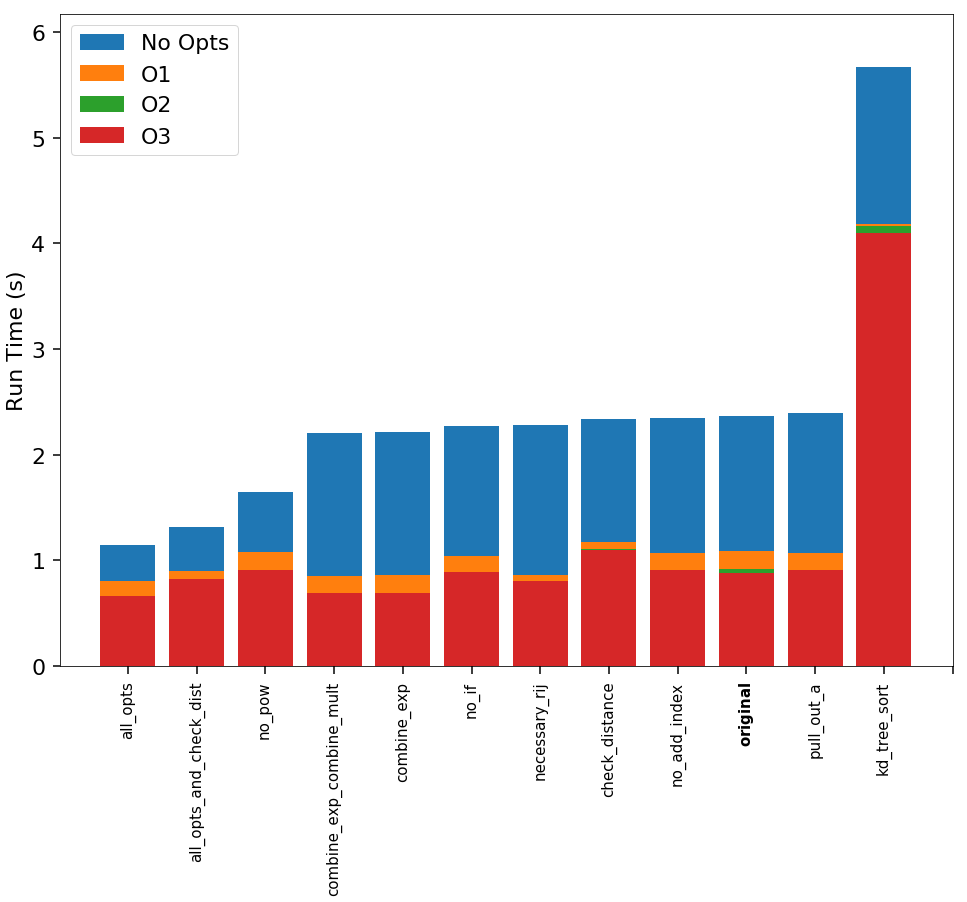

In [181]:
make_bar_charts(data, ['None', 'O1', 'O2', 'O3'], 10000, 0.5, labels=['No Opts', 'O1', 'O2', 'O3'], ignore=['multiple_accumulators'])

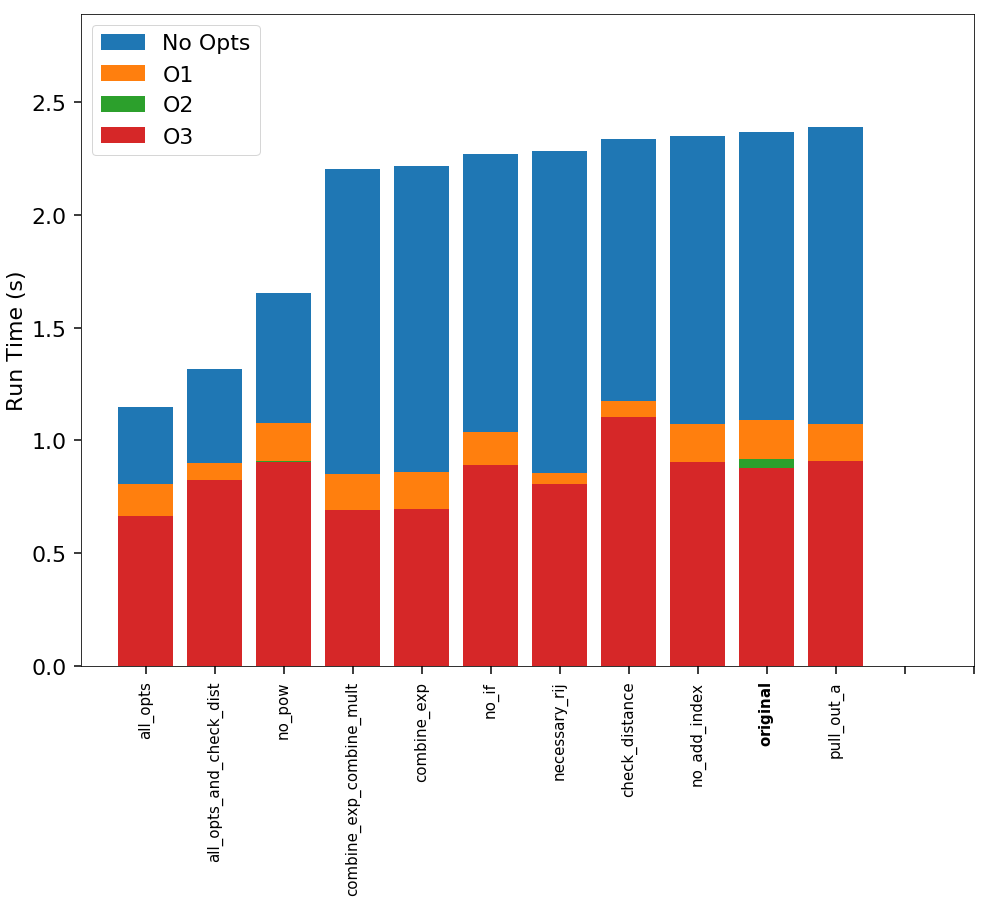

In [179]:
make_bar_charts(data, ['None', 'O1', 'O2', 'O3'], 10000, 0.5, labels=['No Opts', 'O1', 'O2', 'O3'], ignore=['kd_tree_sort', 'multiple_accumulators'])

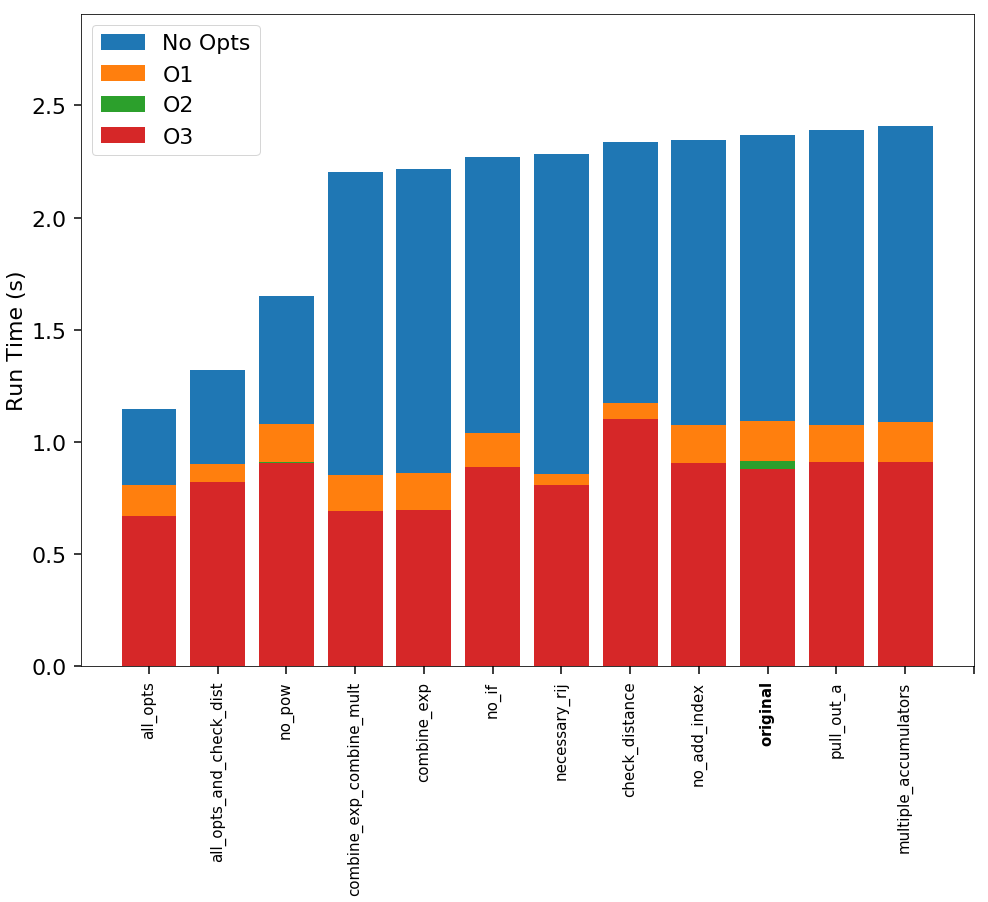

In [180]:
make_bar_charts(data, ['None', 'O1', 'O2', 'O3'], 10000, 0.5, labels=['No Opts', 'O1', 'O2', 'O3'], ignore=['kd_tree_sort'])

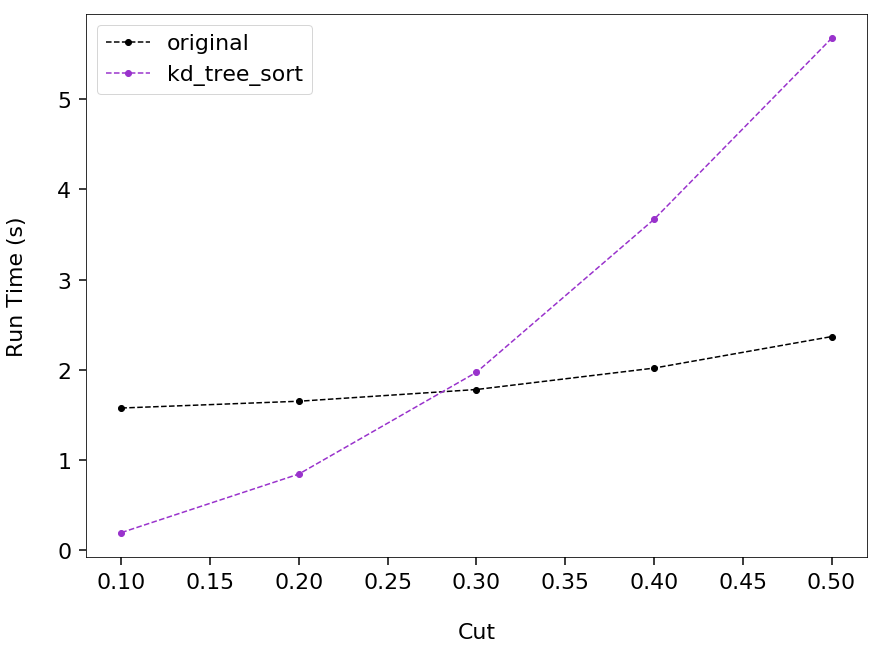

In [159]:
make_plot_cuts(data, 'None', 10000, ['original', 'kd_tree_sort'])

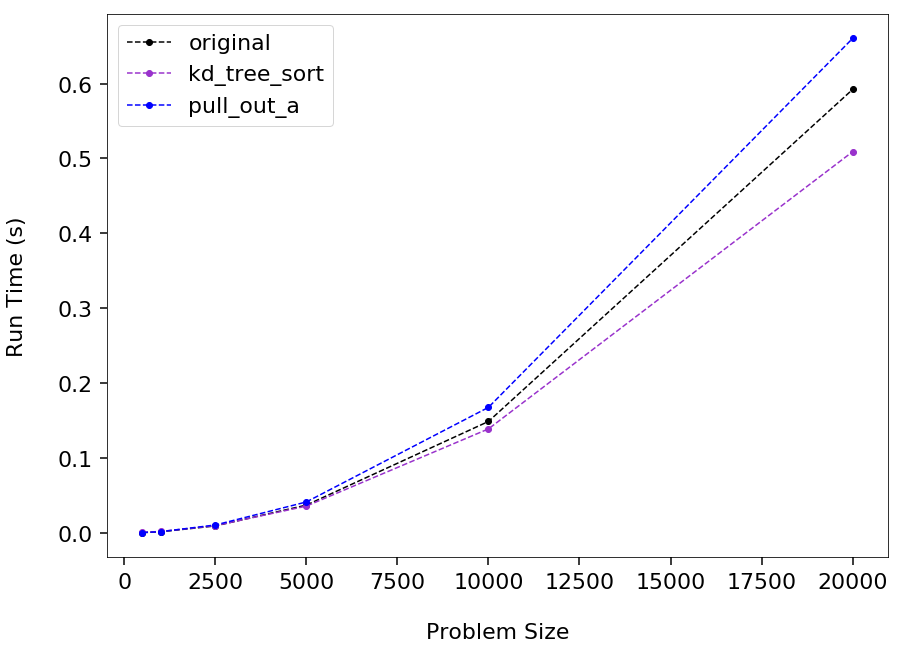

In [173]:
make_plot_sizes(data, 'O3', 0.1, ['original', 'kd_tree_sort', 'pull_out_a'])

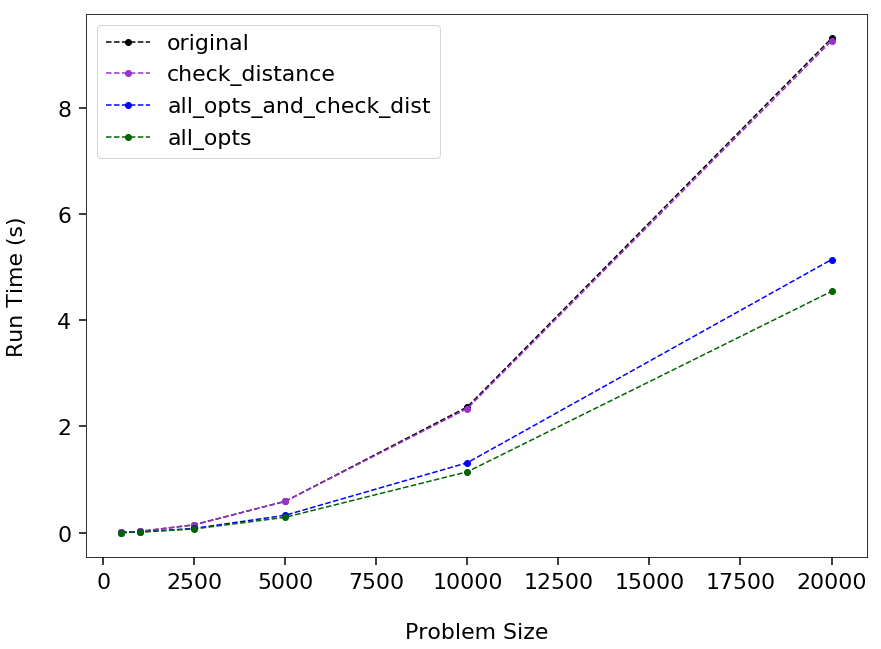

In [103]:
make_plot_sizes(data, 'None', 0.5, ['original', 'check_distance', 'all_opts_and_check_dist', 'all_opts'])

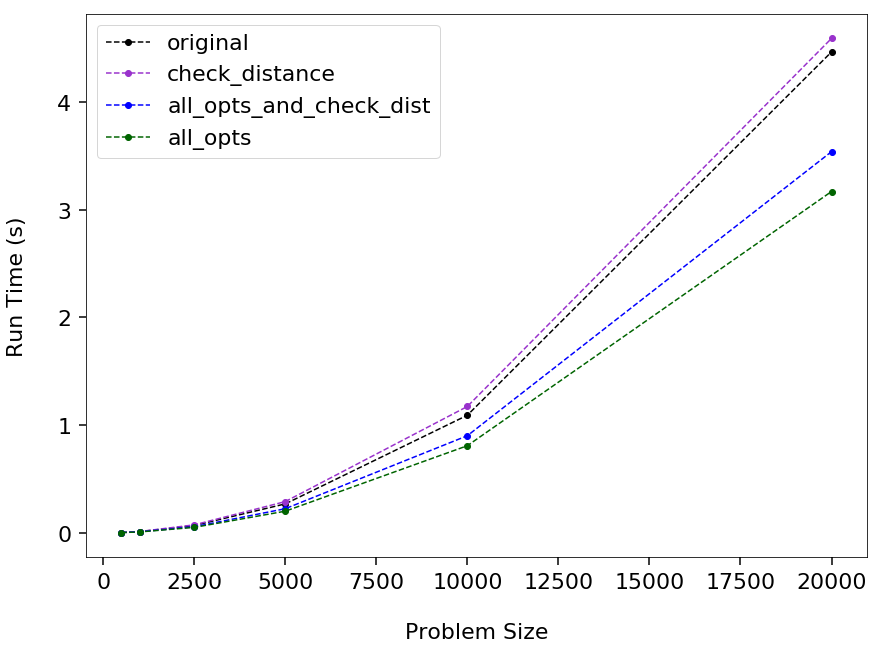

In [104]:
make_plot_sizes(data, 'O1', 0.5, ['original', 'check_distance', 'all_opts_and_check_dist', 'all_opts'])

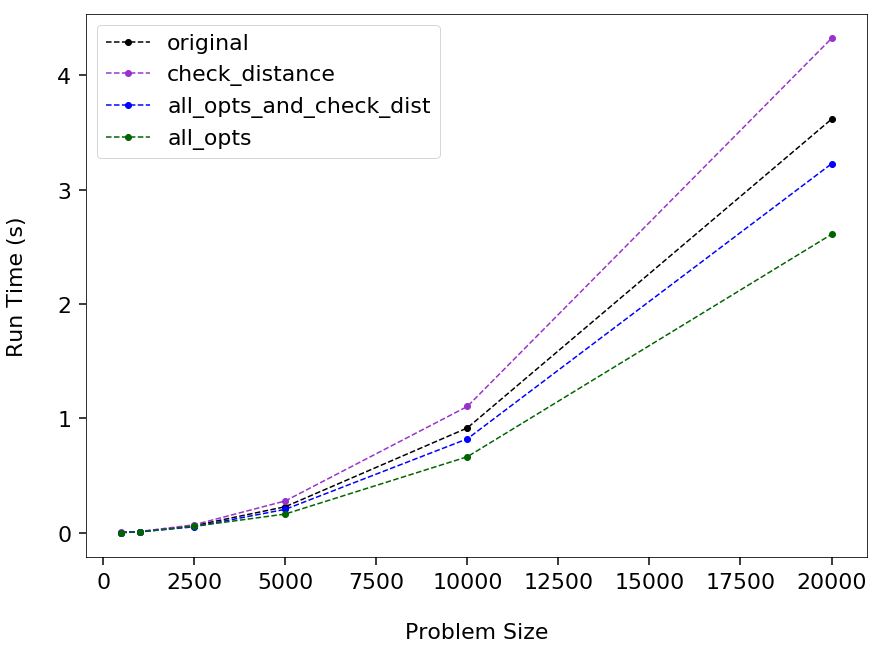

In [105]:
make_plot_sizes(data, 'O2', 0.5, ['original', 'check_distance', 'all_opts_and_check_dist', 'all_opts'])

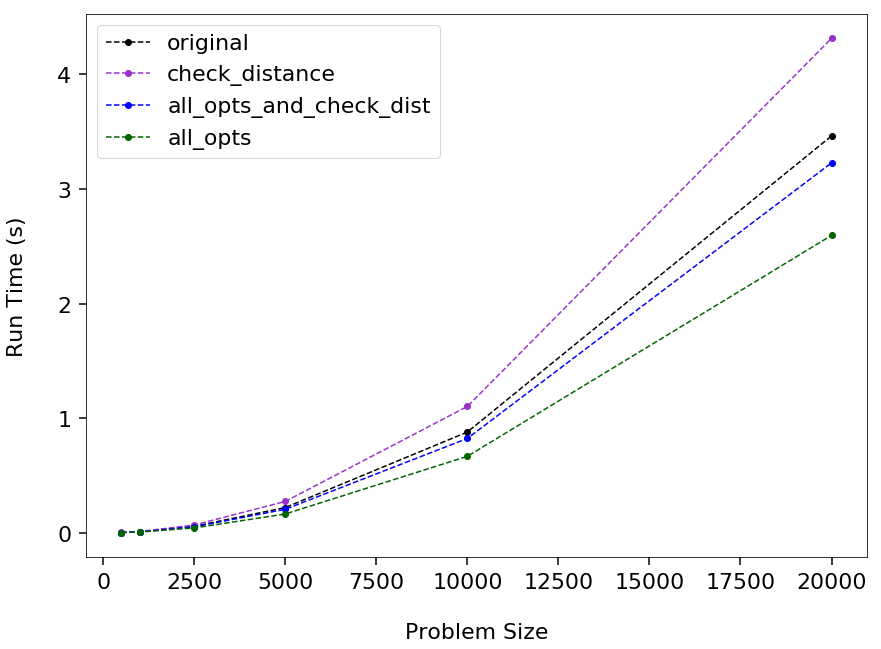

In [106]:
make_plot_sizes(data, 'O3', 0.5, ['original', 'check_distance', 'all_opts_and_check_dist', 'all_opts'])

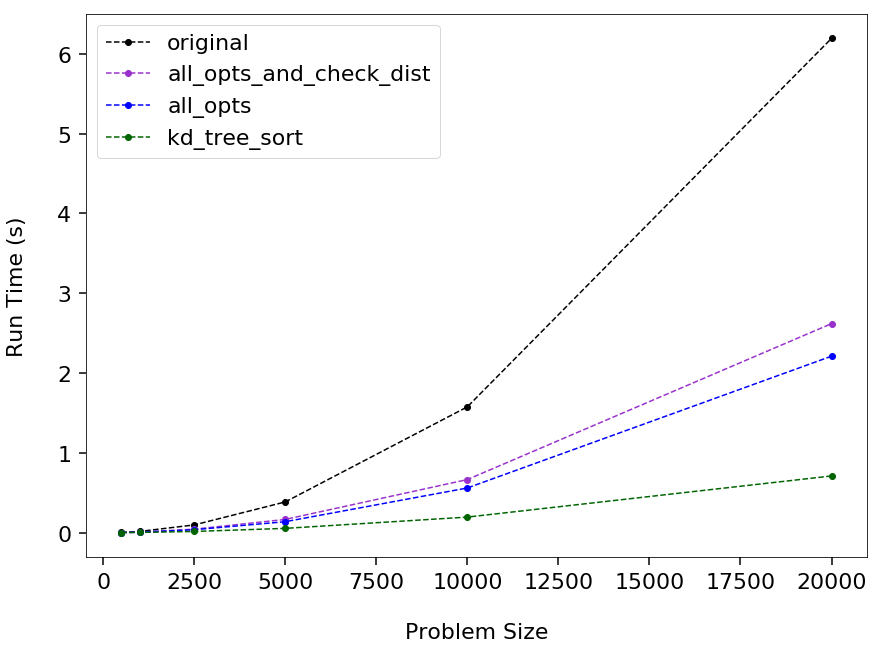

In [107]:
make_plot_sizes(data, 'None', 0.1, ['original', 'all_opts_and_check_dist', 'all_opts', 'kd_tree_sort'])

In [117]:
fn = 'original'
for opt in ["None", "O1", "O2", "O3"]:
    print(fn, "\t", opt, "\t", "{:0.3f}".format(data[opt][10000][0.5][fn]))

original 	 None 	 2.368
original 	 O1 	 1.092
original 	 O2 	 0.916
original 	 O3 	 0.879


In [166]:
fn = 'original'
for opt in ["None", "O1", "O2", "O3"]:
    print("\t\t" + r"{} & {:0.3f} & {:0.3f} \\".format(opt, data[opt][10000][0.5]['original'], data[opt][10000][0.5][fn]))

		None & 2.368 & 2.368 \\
		O1 & 1.092 & 1.092 \\
		O2 & 0.916 & 0.916 \\
		O3 & 0.879 & 0.879 \\


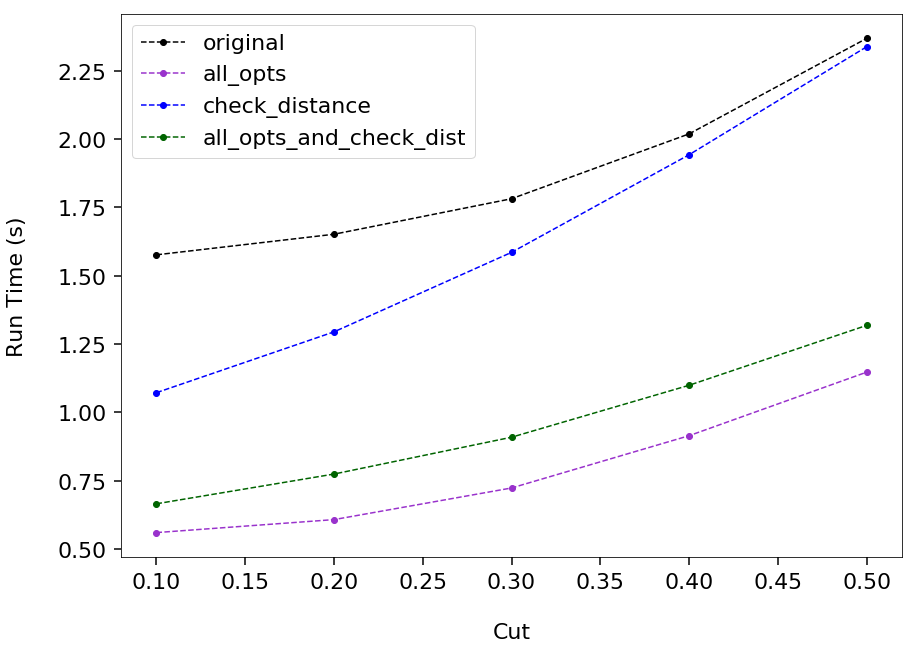

In [147]:
make_plot_cuts(data, 'None', 10000, ['original', 'all_opts', 'check_distance', 'all_opts_and_check_dist'])

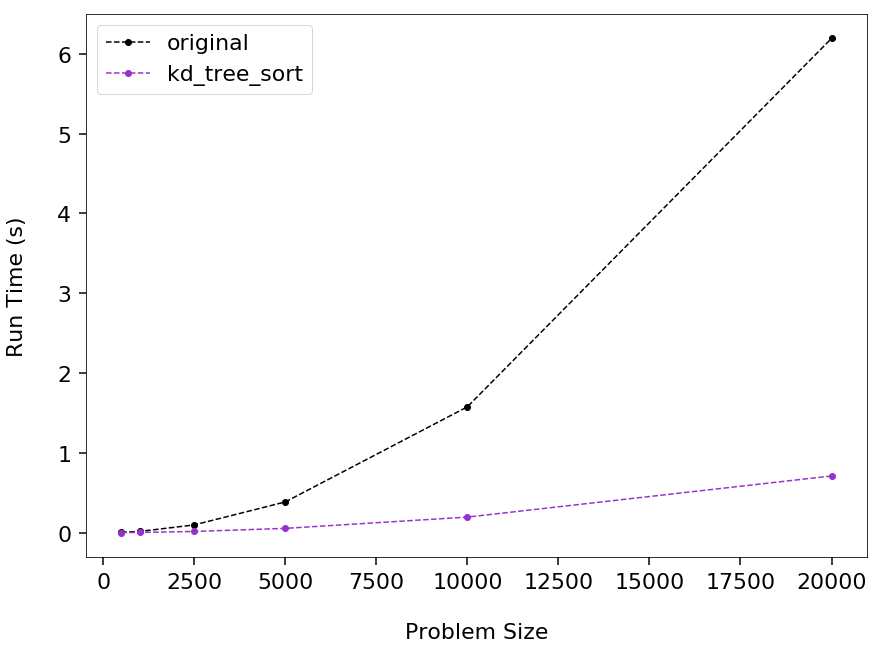

In [175]:
make_plot_sizes(data, 'None', 0.1, ['original', 'kd_tree_sort'])

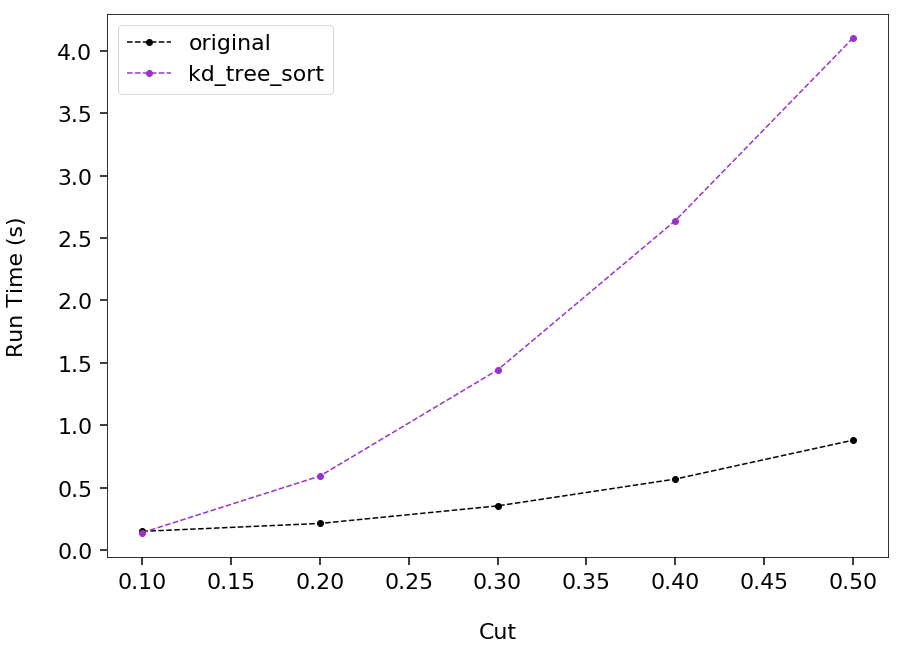

In [178]:
make_plot_cuts(data, 'O3', 10000, ['original', 'kd_tree_sort'])

In [ ]:
data['None']